# ***Customer Behavior Analysis According to Attributes***

---




In this project we will observe customers features and relation between their expenses. (Features such as marital status , education level,age etc.)

ID ->
Customer’s unique identifier

Year_Birth ->
Customer's birth year

Education ->
Education Qualification of customer

Marital_Status ->
Marital Status of customer

Income ->
Customer's yearly household income

Kidhome ->
Number of children in customer's household

Teenhome ->
Number of teenagers in customer's household

Dt_Customer ->
Date of customer's enrollment with the company

Recency ->
Number of days since customer's last purchase

MntWines ->
Amount spent on wine

In [51]:
import numpy as np                               
import pandas as pd               
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import datetime
import matplotlib
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv("marketing_customer_dataset.csv", sep="\t")
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [54]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [55]:
df.value_counts()

ID     Year_Birth  Education   Marital_Status  Income   Kidhome  Teenhome  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0      1985        Graduation  Married         70951.0  0        0         04-05-2013   66       239       10         554              254              87                54            1                  3                4                    9                  1                  0             0             0             0             0             0         3              11         0           1
7373   1952        PhD         Divorced        46610.0  0        2         29-10-2012   8        96        12         96               33               22                43            6                  4   

In [56]:
df.drop_duplicates(inplace=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [57]:
#drop NaN values
df.dropna(inplace=True)
df.head(20)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [58]:
#cleaning the irrelevant columns 
df = df.drop(['Z_CostContact', 'Z_Revenue','Complain','ID'],axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,8,10,4,7,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,1,2,5,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,8,2,10,4,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,2,0,4,6,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,3,6,5,0,0,0,0,0,0


In [59]:
df.shape

(2216, 25)

In [60]:
df['Income'] = df['Income'].fillna(df['Income'].mean())


In [61]:
df['Age'] = 2022 - df["Year_Birth"]

In [62]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<95)]
df = df[(df["Income"]<500000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


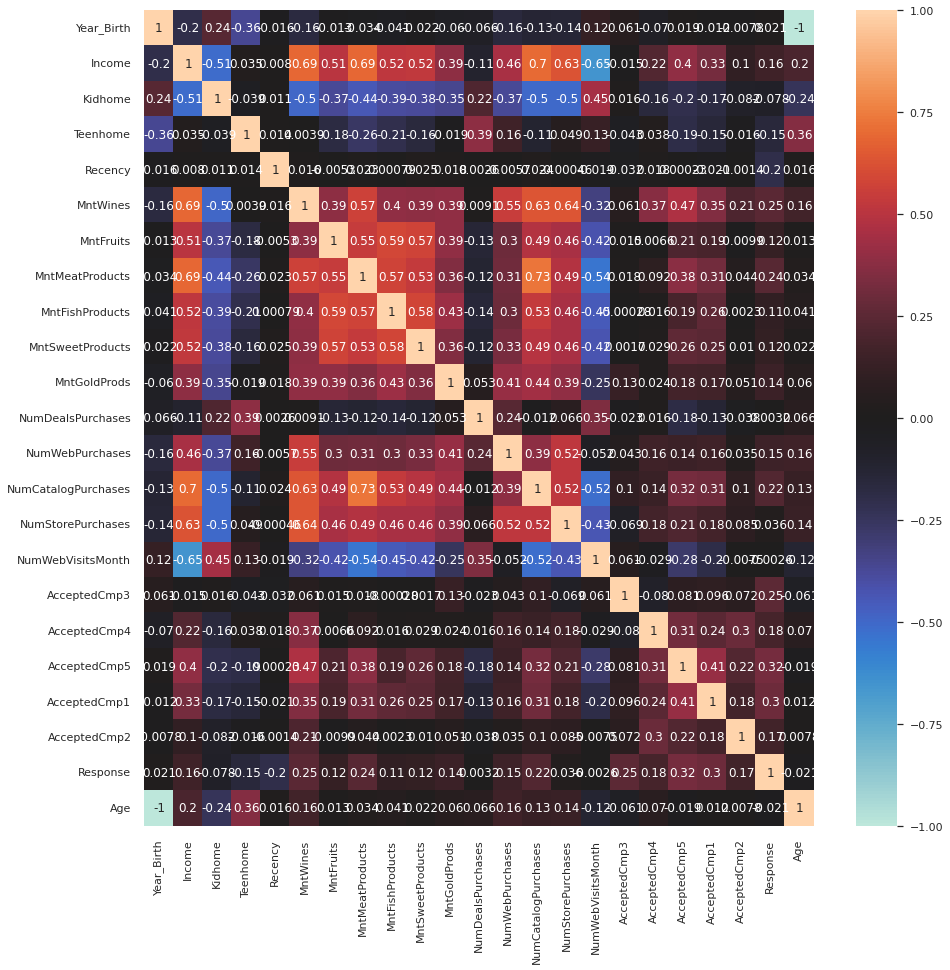

In [63]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,15))  
sns.heatmap(corrmat,annot=True,center=0)

In [64]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,1,65
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,68
2,1965,Graduation,Relationship,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,57
3,1984,Graduation,Relationship,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,38
4,1981,PhD,Relationship,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,41


In [65]:
df['Income'].mean()

51958.81057866185

In [66]:
#Income valuesi 50000 den fazla olanlara kısaca 1 dedik.
df["Income"] = np.where(df["Income"] >50000, 1, 0)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age
0,1957,Graduation,Single,1,0,0,04-09-2012,58,635,88,...,10,4,7,0,0,0,0,0,1,65
1,1954,Graduation,Single,0,1,1,08-03-2014,38,11,1,...,1,2,5,0,0,0,0,0,0,68
2,1965,Graduation,Relationship,1,0,0,21-08-2013,26,426,49,...,2,10,4,0,0,0,0,0,0,57
3,1984,Graduation,Relationship,0,1,0,10-02-2014,26,11,4,...,0,4,6,0,0,0,0,0,0,38
4,1981,PhD,Relationship,1,1,0,19-01-2014,94,173,43,...,3,6,5,0,0,0,0,0,0,41


In [67]:
type(df['Income'][0])

numpy.int64

In [68]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [69]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds","Year_Birth"]
df=df.drop(columns=col_del,axis=1)
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,Graduation,Single,1,04-09-2012,58,65,0,1617,1,25
1,Graduation,Single,0,08-03-2014,38,68,2,27,0,6
2,Graduation,Relationship,1,21-08-2013,26,57,0,776,0,21
3,Graduation,Relationship,0,10-02-2014,26,38,1,53,0,8
4,PhD,Relationship,1,19-01-2014,94,41,1,422,0,19


In [70]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
df['Education'] = df['Education'].replace(['Basic'], 'UG')

In [71]:
df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer)
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

<Figure size 576x576 with 0 Axes>

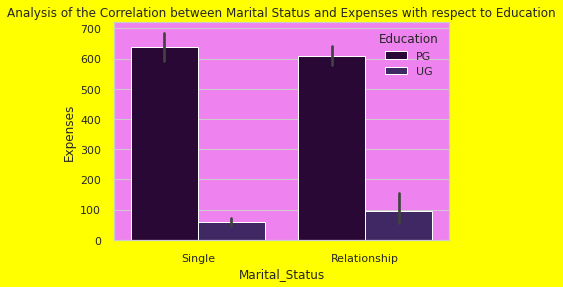

In [72]:
plt.figure(figsize=(8,8))
plt.figure(facecolor='yellow')
plt.title("Analysis of the Correlation between Marital Status and Expenses with respect to Education")

ax = plt.axes()
# Setting the background color of the
# plot using set_facecolor() method
ax.set_facecolor("violet")
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]
sns.barplot(x=df['Marital_Status'], y=df['Expenses'], hue = df["Education"],palette=pal)

plt.show()

<Figure size 576x576 with 0 Axes>

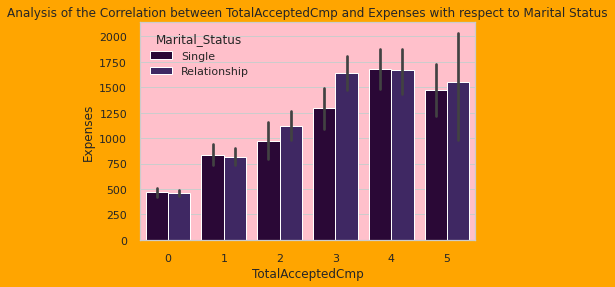

In [73]:
plt.figure(figsize=(8,8))
plt.figure(facecolor='orange')
plt.title("Analysis of the Correlation between TotalAcceptedCmp and Expenses with respect to Marital Status")

ax = plt.axes()
# Setting the background color of the
# plot using set_facecolor() method
ax.set_facecolor("pink")
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]
sns.barplot(x=df['TotalAcceptedCmp'], y=df['Expenses'], hue = df["Marital_Status"],palette=pal)

plt.show()

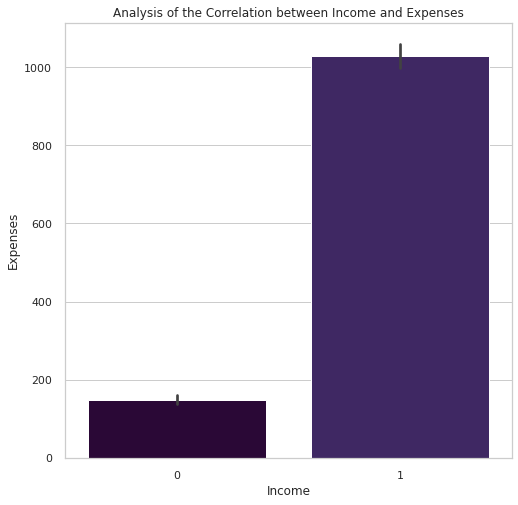

In [74]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Income'], y=df['Expenses'],palette=pal)
plt.title("Analysis of the Correlation between Income and Expenses")
plt.show()

In [75]:
objectTypes = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        objectTypes.append(i)

print(objectTypes)

['Education', 'Marital_Status']


In [76]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in df.columns:
    df[i]=df[[i]].apply(LE.fit_transform)

In [77]:
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,first_day,day_engaged
0,0,1,1,15,58,39,0,901,1,24,0,646
1,0,1,0,634,38,42,2,21,0,5,0,27
2,0,0,1,367,26,31,0,499,0,20,0,294
3,0,0,0,645,26,12,1,47,0,7,0,16
4,0,0,1,504,94,15,1,318,0,18,0,157


In [78]:
df["first_day"] = df["first_day"].values.astype('int64')
df["Dt_Customer"] = df["Dt_Customer"].values.astype('int64')

In [79]:
df.first_day

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    0
2238    0
2239    0
Name: first_day, Length: 2212, dtype: int64

In [80]:
dataFr = df.copy()

#Scaling
scaler = StandardScaler()
scaler.fit(dataFr)
scaled_dataFr = pd.DataFrame(scaler.transform(dataFr),columns= dataFr.columns )


In [81]:
#Scaled data will be used for reducing the dimensionality(PCA)
print("Scaled version of dataframe.")
scaled_dataFr.head()

Scaled version of dataframe.


,Education,Marital_Status,Income,Dt_Customer,Recency,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,first_day,day_engaged
0,-0.158187,1.349603,0.958370,-1.642295,0.310353,1.018617,-1.264598,1.637906,0.617244,1.322845,0.0,1.642295
1,-0.158187,1.349603,-1.043438,1.600691,-0.380813,1.275098,1.404572,-1.095211,-0.502808,-1.163250,0.0,-1.600691
2,-0.158187,-0.740959,0.958370,0.201858,-0.795514,0.334669,-1.264598,0.389368,-0.502808,0.799457,0.0,-0.201858
3,-0.158187,-0.740959,-1.043438,1.658320,-0.795514,-1.289707,0.069987,-1.014460,-0.502808,-0.901556,0.0,-1.658320
4,-0.158187,-0.740959,0.958370,0.919611,1.554453,-1.033227,0.069987,-0.172784,-0.502808,0.537763,0.0,-0.919611


In [82]:
#Reduce dimensions to increase certainity
pca = PCA(n_components=2)
pca.fit(scaled_dataFr)
PCA_dataFr = pd.DataFrame(pca.transform(scaled_dataFr), columns=(["first_column","second_column"]))
PCA_dataFr.describe().T

,count,mean,std,min,25%,50%,75%,max
first_column,2212.0,-4.448170e-17,1.748783,-3.379573,-1.607876,-0.117035,1.517003,4.201915
second_column,2212.0,-4.236113e-17,1.406231,-3.168765,-1.170194,-0.008677,1.119202,3.748627


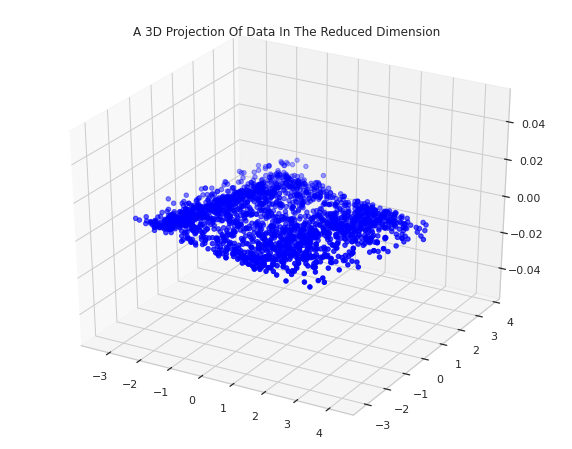

In [83]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_dataFr["first_column"]
y =PCA_dataFr["second_column"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, color = "blue")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


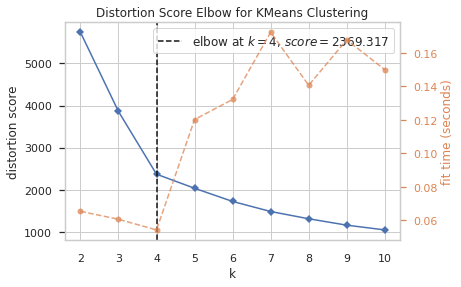

In [84]:
#We use elbow method to find numbers of clusters to create 
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_dataFr)
Elbow_M.show()

In [85]:
#Creating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_dataFr)
PCA_dataFr["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

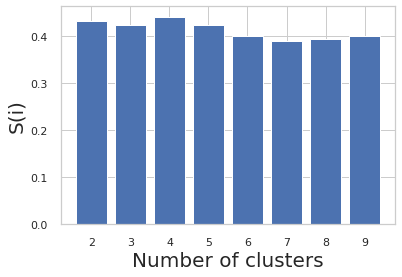

In [86]:
from sklearn.metrics import silhouette_score 
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, m1.fit_predict(df))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [87]:
silhouette_scores

[0.43122920015226657,
 0.4225448331032722,
 0.4407589227591996,
 0.42324516070620705,
 0.40054517892496044,
 0.38897215383266665,
 0.3927032630871387,
 0.39915832538276574]

In [88]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  4


In [89]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(df)
pred=kmeans.predict(df)


# Appending those cluster value into main dataframe (without standard-scalar)

df['Clusters'] = pred + 1
df.head(5)

,Education,Marital_Status,Income,Dt_Customer,Recency,Age,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,first_day,day_engaged,Clusters
0,0,1,1,15,58,39,0,901,1,24,0,646,1
1,0,1,0,634,38,42,2,21,0,5,0,27,2
2,0,0,1,367,26,31,0,499,0,20,0,294,3
3,0,0,0,645,26,12,1,47,0,7,0,16,2
4,0,0,1,504,94,15,1,318,0,18,0,157,2


In [90]:
df['Clusters'].value_counts()

2    675
4    664
1    451
3    422
Name: Clusters, dtype: int64

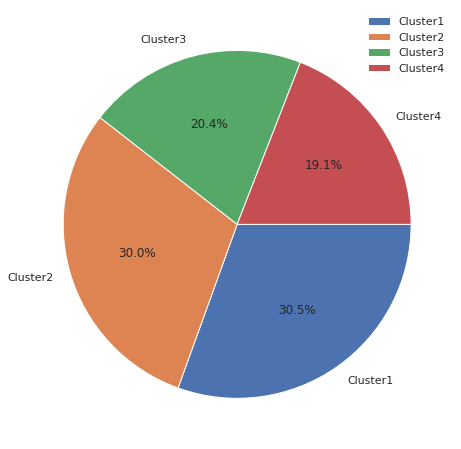

In [91]:
plt.figure(figsize=(8,8))
plt.pie(df['Clusters'].value_counts(), labels = ["Cluster1", "Cluster2","Cluster3","Cluster4"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

In [92]:
PLOT = go.Figure()
for a in list(df.Clusters.unique()):
    PLOT.add_trace(go.Scatter3d(x = df[df.Clusters == a]['Income'],
                                y = df[df.Clusters == a]['Age'],
                                z = df[df.Clusters == a]['Expenses'],                        
                                mode = 'markers',marker_size = 8, marker_line_width = 1,
                                name = str(a)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Age: %{y} <br>Expenses: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'green'),
                                yaxis=dict(title = 'Age', titlefont_color = 'green'),
                                zaxis=dict(title = 'Expenses', titlefont_color = 'green')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

<Figure size 576x576 with 0 Axes>

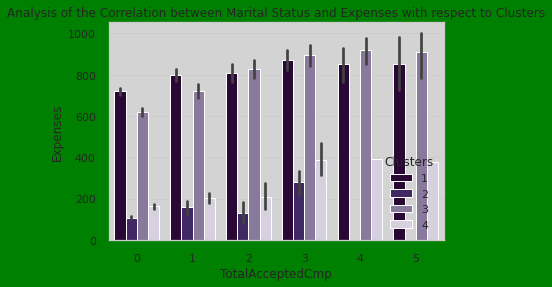

In [93]:
plt.figure(figsize=(8,8))
plt.figure(facecolor='green')
plt.title("Analysis of the Correlation between Marital Status and Expenses with respect to Clusters")

ax = plt.axes()
# Setting the background color of the
# plot using set_facecolor() method
ax.set_facecolor("lightgrey")
sns.set_theme(style="whitegrid")
pal = ["#2E003E", "#3D1E6D", "#8874A3", "#D5CEE1"]
sns.barplot(x=df['TotalAcceptedCmp'], y=df['Expenses'], hue = df["Clusters"],palette=pal)

plt.show()

In [94]:
#kmeans

print("ConfusionMatrix \n",confusion_matrix(kmeans.labels_, pred))
print("Classification report \n", classification_report(kmeans.labels_, pred))

ConfusionMatrix 
 [[451   0   0   0]
 [  0 675   0   0]
 [  0   0 422   0]
 [  0   0   0 664]]
Classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       675
           2       1.00      1.00      1.00       422
           3       1.00      1.00      1.00       664

    accuracy                           1.00      2212
   macro avg       1.00      1.00      1.00      2212
weighted avg       1.00      1.00      1.00      2212



In [95]:
#Logistic Regression
df2=df.copy()
x = df2.drop('Clusters', axis=1)
y = df2['Clusters']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [97]:
#scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [98]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
LogisticRegression()
y_predicted = log_reg.predict(x_test)

Confusion Matrix: 


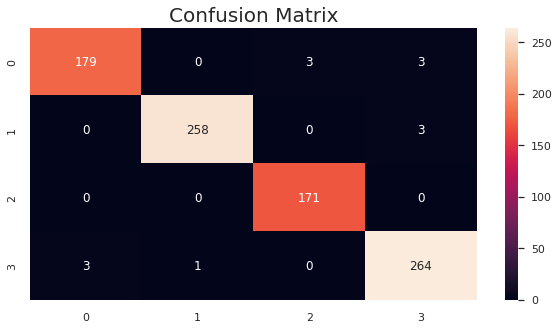

In [99]:
print("Confusion Matrix: ")
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='g');
plt.title('Confusion Matrix', fontsize=20)
plt.show()

In [100]:
#performance of model
print("Classification Report: \n", classification_report(y_test,y_predicted))
print("-" * 100)
print()
    
acc = accuracy_score(y_test, y_predicted)

print("Accuracy Score: ", acc)
print("-" * 100)
print()

f1 = f1_score(y_test, y_predicted,average="weighted")

print("F1 Score: ", f1)
print("-" * 100)
print()
    


Classification Report: 
               precision    recall  f1-score   support

           1       0.98      0.97      0.98       185
           2       1.00      0.99      0.99       261
           3       0.98      1.00      0.99       171
           4       0.98      0.99      0.98       268

    accuracy                           0.99       885
   macro avg       0.99      0.99      0.99       885
weighted avg       0.99      0.99      0.99       885

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.9853107344632769
----------------------------------------------------------------------------------------------------

F1 Score:  0.9852962189717729
----------------------------------------------------------------------------------------------------

